In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df=  pd.read_csv('dataset.csv')

In [6]:
df.head()

Country  Year  Hospital_density           gdp  Communicable_disease  \
0  Australia  2000             6.648  4.158450e+11                  35.6   
1  Australia  2001             6.656  3.793580e+11                  53.3   
2  Australia  2002             6.586  3.955730e+11                  32.2   
3  Australia  2003             6.521  4.674980e+11                  29.3   
4  Australia  2004             6.477  6.143260e+11                  46.4   

   Hospital_Expenditure  Total_Health_Expenditure  Injury Count  \
0                 2.987                     7.594        138.30   
1                 3.024                     7.678        141.76   
2                 3.123                     7.876        142.60   
3                 3.157                     7.881        143.47   
4                 3.250                     8.087        144.10   

   life_expectancy  Mortality  Population  
0             79.2      676.8  19028802.0  
1             79.6      667.5  19274701.0  
2             79.9      682.5  19495210.0  
3             80.2      668.3  19720737.0  
4             80.5      663.8  19932722.0

In [10]:
# standardizing the country column

df['Country'] = df['Country'].str.upper()

In [11]:
df.head()

Country  Year  Hospital_density           gdp  Communicable_disease  \
0  AUSTRALIA  2000             6.648  4.158450e+11                  35.6   
1  AUSTRALIA  2001             6.656  3.793580e+11                  53.3   
2  AUSTRALIA  2002             6.586  3.955730e+11                  32.2   
3  AUSTRALIA  2003             6.521  4.674980e+11                  29.3   
4  AUSTRALIA  2004             6.477  6.143260e+11                  46.4   

   Hospital_Expenditure  Total_Health_Expenditure  Injury Count  \
0                 2.987                     7.594        138.30   
1                 3.024                     7.678        141.76   
2                 3.123                     7.876        142.60   
3                 3.157                     7.881        143.47   
4                 3.250                     8.087        144.10   

   life_expectancy  Mortality  Population  
0             79.2      676.8  19028802.0  
1             79.6      667.5  19274701.0  
2             79.9      682.5  19495210.0  
3             80.2      668.3  19720737.0  
4             80.5      663.8  19932722.0

In [12]:
# grouping according to country, hospital density and gdp

density = df.groupby(['Country']).agg({'gdp': 'mean', 'Hospital_density': 'mean'}).reset_index()

density.head()

Country           gdp  Hospital_density
0  AUSTRALIA  1.084853e+12          5.956478
1    AUSTRIA  3.754829e+11          3.201348
2    BELGIUM  4.548383e+11          1.774783
3   BULGARIA  4.891660e+10          4.510957
4     CANADA  1.475589e+12          2.130043

In [13]:
density.shape

(39, 3)

`GDP vs. Hospital Density`

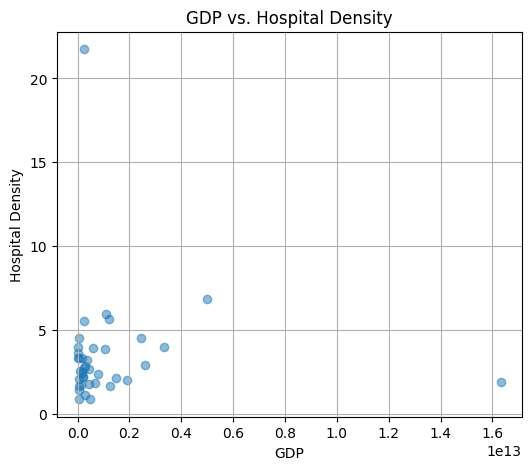

In [112]:
plt.figure(figsize=(6, 5))
plt.scatter(density['gdp'], density['Hospital_density'], alpha=0.5)
plt.xlabel('GDP')
plt.ylabel('Hospital Density')
plt.title('GDP vs. Hospital Density')
plt.grid(True)
plt.show()

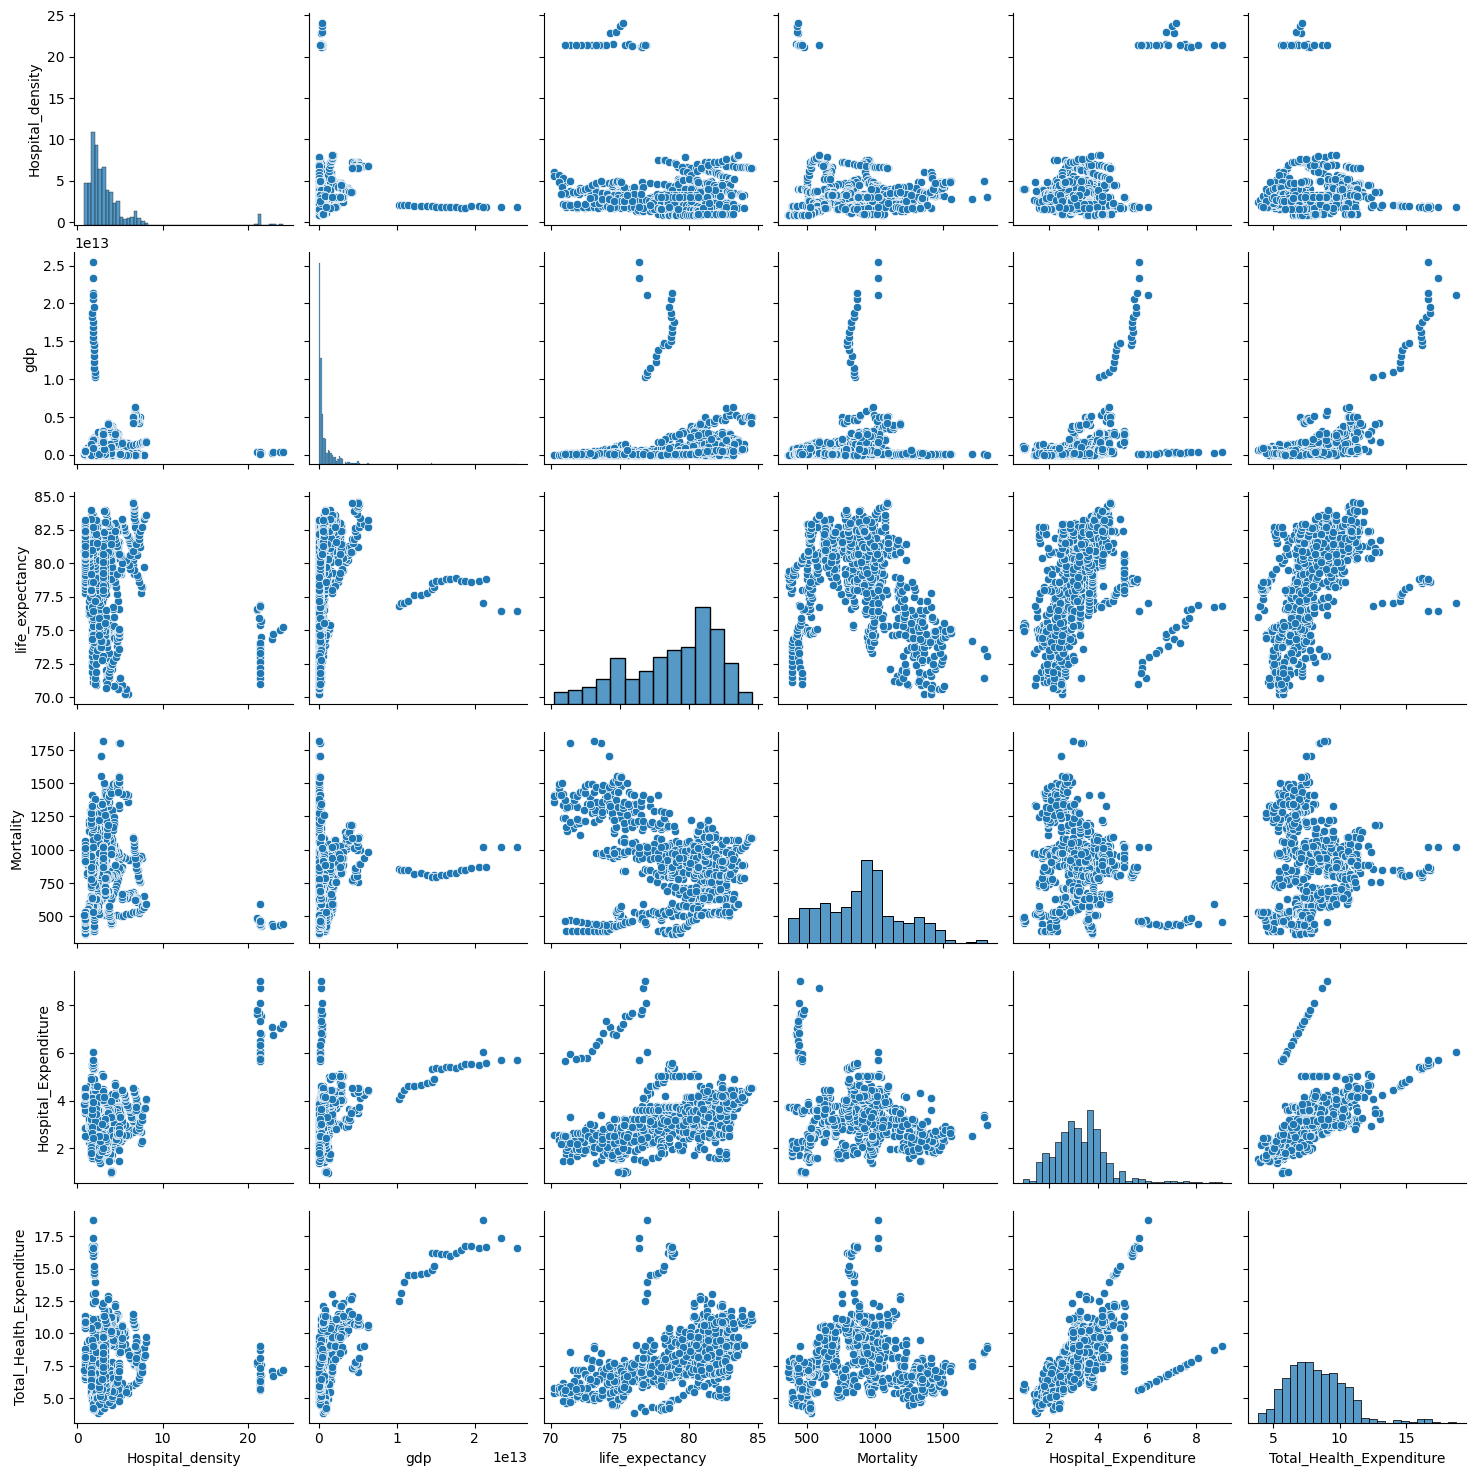

In [21]:
sns.pairplot(df[['Hospital_density', 'gdp', 'life_expectancy', 'Mortality', 'Hospital_Expenditure', 'Total_Health_Expenditure']])
plt.show()

`Correlation Heatmap`

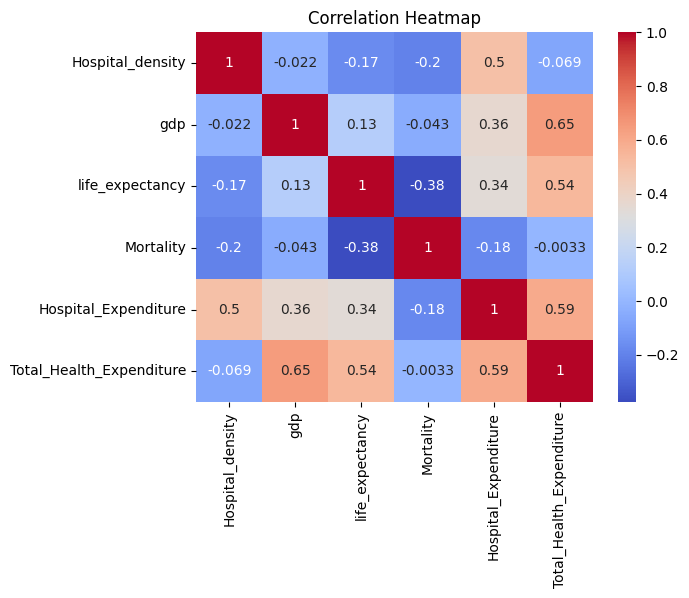

In [22]:
correlation_matrix = df[['Hospital_density', 'gdp', 'life_expectancy', 'Mortality', 'Hospital_Expenditure', 'Total_Health_Expenditure']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

`gdp vs Mortality vs Hospital Density`

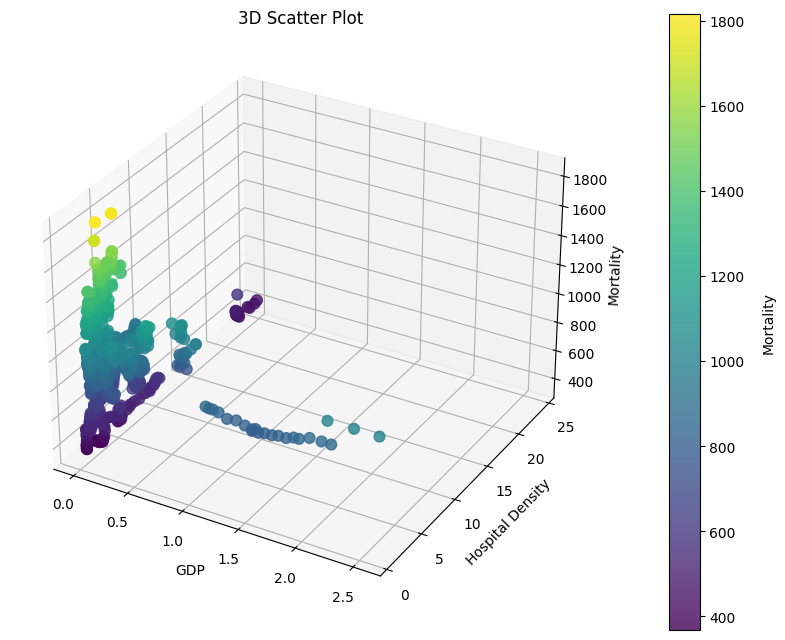

In [51]:
# Create a figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define color mapping for Mortality values
colors = df['Mortality']
colormap = plt.get_cmap('viridis')
normalize = plt.Normalize(np.min(colors), np.max(colors))

# Create a scatter plot with color mapping
sc = ax.scatter(df['gdp'], df['Hospital_density'], df['Mortality'], c=colors, cmap=colormap, marker='o', s=60, alpha=0.8)

# Customize the color bar
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Mortality')
cbar.ax.yaxis.labelpad = 12

# Add grid lines
ax.grid(True, linestyle='--', alpha=0.7)

# Label the axes and add a title
ax.set_xlabel('GDP')
ax.set_ylabel('Hospital Density')
ax.set_zlabel('Mortality')
ax.set_title('3D Scatter Plot')

plt.show()

`GDP, Hospital Density, and Health Expenditure per Capita`

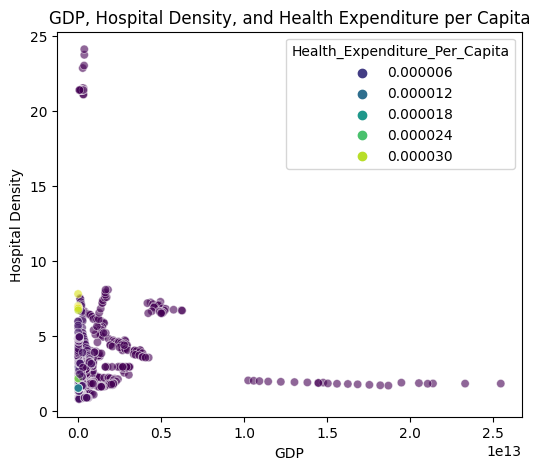

In [72]:
# Feature Engineering
df['Health_Expenditure_Per_Capita'] = df['Total_Health_Expenditure'] / df['Population']


plt.figure(figsize=(6, 5))
sns.scatterplot(x='gdp', y='Hospital_density', hue='Health_Expenditure_Per_Capita', data=df, alpha=0.6, palette='viridis')
plt.xlabel('GDP')
plt.ylabel('Hospital Density')
plt.title('GDP, Hospital Density, and Health Expenditure per Capita')


plt.show()


`Top 15 Countries with Highest Mean Communicable Disease Rates and Mean Hospital Density`

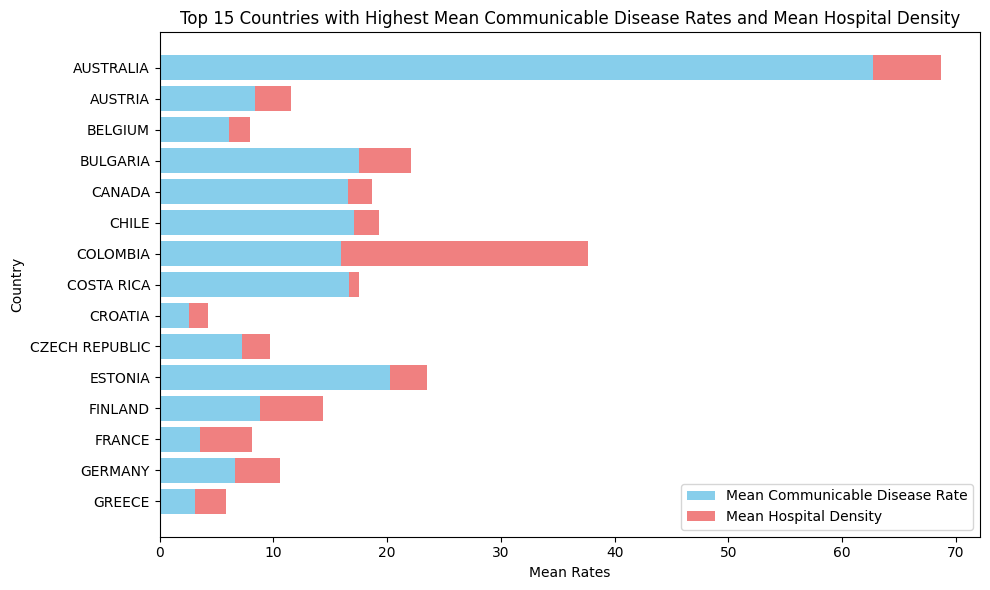

In [48]:
top_communicable_disease_rates = df[['Country', 'Communicable_disease', 'Hospital_density']].sort_values(by='Communicable_disease', ascending=False)
grouped_data = top_communicable_disease_rates.groupby('Country').agg({'Communicable_disease': 'mean', 'Hospital_density': 'mean'}).reset_index().head(15)
plt.figure(figsize=(10, 6))
plt.barh(grouped_data['Country'], grouped_data['Communicable_disease'], color='skyblue', label='Mean Communicable Disease Rate')
plt.barh(grouped_data['Country'], grouped_data['Hospital_density'], color='lightcoral', label='Mean Hospital Density', left=grouped_data['Communicable_disease'])
plt.xlabel('Mean Rates')
plt.ylabel('Country')
plt.title('Top 15 Countries with Highest Mean Communicable Disease Rates and Mean Hospital Density')
plt.legend()
plt.gca().invert_yaxis()  # Reverse the order to show the highest rates at the top
plt.tight_layout()
plt.show()


`Hospital_Expenditure vs Hospital_density`

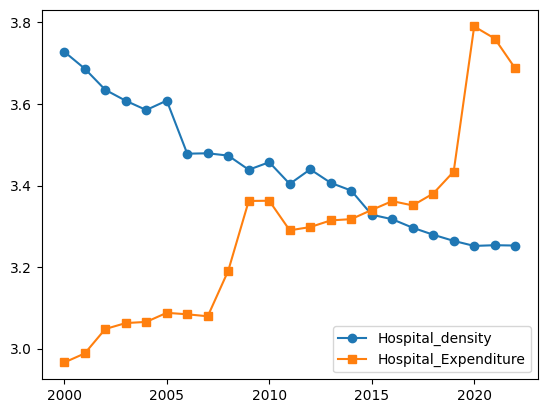

In [113]:
grouped_data2 = df.groupby('Year').agg({
    'Mortality': 'mean',
    'Hospital_density': 'mean',
    'Population': 'mean',
    'Hospital_Expenditure': 'mean'
}).reset_index()

plt.plot(grouped_data2['Year'], grouped_data2['Hospital_density'], label='Hospital_density', marker='o')
plt.plot(grouped_data2['Year'], grouped_data2['Hospital_Expenditure'], label='Hospital_Expenditure', marker='s')
plt.legend()



`Injury Count vs Communicable_disease vs Mortality `

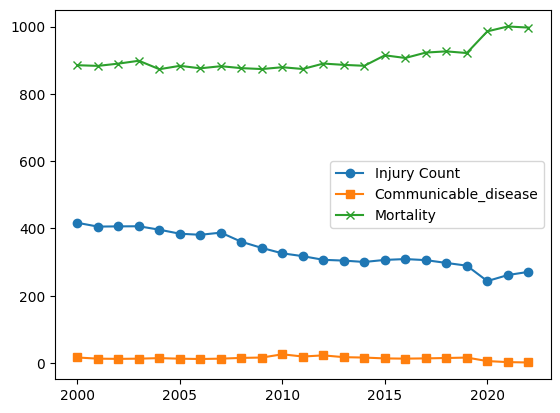

In [71]:
grouped_data3 = df.groupby('Year').agg({
    'Injury Count': 'mean',
    'Hospital_density': 'mean',
    'Communicable_disease': 'mean',
    'Mortality': 'mean'
}).reset_index()

plt.plot(grouped_data3['Year'], grouped_data3['Injury Count'], label='Injury Count', marker='o')
plt.plot(grouped_data3['Year'], grouped_data3['Communicable_disease'], label='Communicable_disease', marker='s')
plt.plot(grouped_data3['Year'], grouped_data3['Mortality'], label='Mortality', marker='x')

plt.legend()

`Hospital_density per country`

In [94]:
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
import folium

In [95]:
# Create a Nominatim geocoder instance with a custom user agent
nom = Nominatim(user_agent="GetLoc")

# Geocode each location in the 'País' column and assign the result to the 'Geometry' column
grouped_data5['Geometry'] = grouped_data5['Country'].apply(lambda x: nom.geocode(x) if x else None)

# Extract latitude from the 'Geometry' column and assign it to the 'Latitude' column
grouped_data5['Latitude'] = grouped_data5['Geometry'].apply(lambda loc: loc.latitude if loc else None)

# Extract longitude from the 'Geometry' column and assign it to the 'Longitude' column
grouped_data5['Longitude'] = grouped_data5['Geometry'].apply(lambda loc: loc.longitude if loc else None)

In [96]:
m3 = folium.Map(location=[39.326234, -4.838065], tiles= 'openstreetmap', zoom_start=3)

def color_producer(val):
    if val <=5:
        return 'red'
    else:
        return 'green'

for i in range(0, len(grouped_data5)):
    folium.Circle(location=[grouped_data5.iloc[i]['Latitude'], grouped_data5.iloc[i]['Longitude']],
    radius= 30000*grouped_data5.iloc[i]['Hospital_density'], color= color_producer(grouped_data5.iloc[i]['Hospital_density'])).add_to(m3)
    
m3.save('map4.html')
m3

`Hospital_density vs Mortality`

In [110]:

# Create a Folium map
m = folium.Map(location=[0, 0], zoom_start=2)

# Assuming you have a DataFrame named grouped_data5 with 'Latitude', 'Longitude', 'Hospital_density', and 'Mortality' columns
for i in range(0, len(grouped_data5)):
    hospital_density = grouped_data5.iloc[i]['Hospital_density']
    mortality = grouped_data5.iloc[i]['Mortality']
    
    # Define a custom color function for 'Hospital_density'
    def hospital_density_color_producer(hd):
        if hd <= 5:
            return 'red'
        else:
            return 'green'
    
    # Define a custom color function for 'Mortality'
    def mortality_color_producer(mort):
        if mort <= 600:
            return 'blue'
        else:
            return 'purple'
    
    # Use different markers for 'Hospital_density' and 'Mortality'
    folium.Circle(
        location=[grouped_data5.iloc[i]['Latitude'], grouped_data5.iloc[i]['Longitude']],
        radius=30000 * hospital_density,
        color=hospital_density_color_producer(hospital_density),
        fill=True,
        fill_color='transparent',
        fill_opacity=0.7,
    ).add_to(m)
    
    folium.Circle(
        location=[grouped_data5.iloc[i]['Latitude'], grouped_data5.iloc[i]['Longitude']],
        radius=200 * mortality,
        color=mortality_color_producer(mortality),
        fill=True,
        fill_color='transparent',
        fill_opacity=0.7,
    ).add_to(m)

# Save the map to an HTML file or display it
m.save('map.html')


In [111]:
m